In [52]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from numpy import sqrt
import pandas as pd
import scipy.constants as const
from scipy.optimize import curve_fit                        # Funktionsfit:     popt, pcov = curve_fit(func, xdata, ydata) 
from uncertainties import ufloat                            # Fehler:           fehlerwert =  ulfaot(x, err)
from uncertainties import unumpy as unp 
from uncertainties.unumpy import uarray                     # Array von Fehler: fehlerarray =  uarray(array, errarray)
from uncertainties.unumpy import (nominal_values as noms,   # Wert:             noms(fehlerwert) = x
                                  std_devs as stds)         # Abweichung:       stds(fehlerarray) = errarray

Tabelle erstellen:

In [53]:
md = pd.read_csv('tables/leistung.csv')
print(md.to_latex(index = False, column_format= "c c", decimal=',')) 

\begin{tabular}{c c}
\toprule
 l/cm &  P/mW \\
\midrule
   65 &   7,1 \\
   80 &   7,8 \\
   95 &   7,0 \\
\bottomrule
\end{tabular}



Daten auswerten:

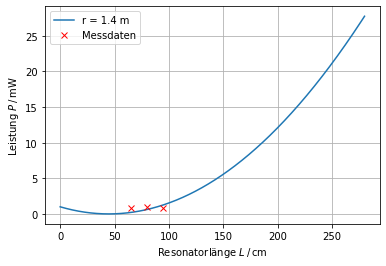

In [54]:
np.savetxt('tables/leistung.txt', md.values, header='l/cm P/mW', fmt='%.1f')
l, P = np.genfromtxt('tables/leistung.txt', unpack=True, skip_header=1)
P /= 8

def f(L,r):
    return (1 - L / r)*(1 - L / r)

r_2 = 140
L_2 = np.linspace(0,2 * 140,1000)
# xx = np.linspace(100, 150000, 100)

para, pcov = curve_fit(f, l, P)
pcov = np.sqrt(np.diag(pcov))
a = para
fa = pcov 
# print(f(L_2,r_2) * f(L_2,r_2))

plt.plot(L_2, f(L_2,a), label='r = 1.4 m')
plt.plot(l, P, 'xr', label='Messdaten')

plt.xlabel(r'Resonatorlänge $L \, / \, \mathrm{cm}$')
plt.ylabel(r'Leistung $P \, / \, \mathrm{mW}$')
plt.grid(True)                          # grid style
plt.legend(loc='best')

Fehler berechnen:

7.76+/-0.07 60.3+/-1.8 14.70+/-0.08
[ 7.76079029 14.70158411 60.28450607]


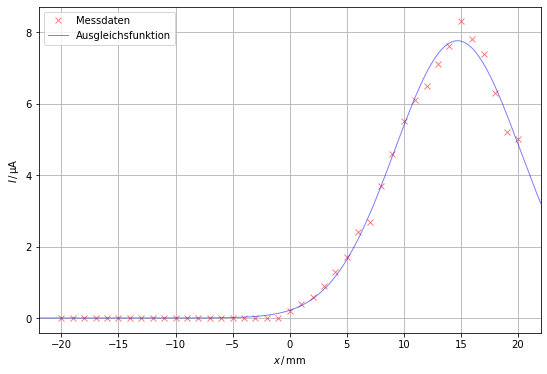

In [62]:
moden = pd.read_csv('tables/moden.csv')
moden = moden.iloc[:, :]
np.savetxt('tables/moden.txt', moden.values, header='x/mm I/mikroA I/mikroA', fmt='%.3f')
x, tem00, tem01 = np.genfromtxt('tables/moden.txt', unpack=True, skip_header=1)

# für den initial guess bei curvefit()
n = len(x)                             # Anzahl der Daten
mean00 = sum(x*tem00)/n                      # Mittelwert
mean01 = sum(x*tem01)/n 
sigma00 = np.sqrt(sum(tem00*(x - mean00)**2))  # Standardabweichung
sigma01 = np.sqrt(sum(tem01*(x - mean01)**2))  # Standardabweichung

# Ausgleichsrechung nach Gaußverteilung
def g00(x,a,x0,b):
    return a*np.exp(-(x-x0)**2/(b))     # b = 2*sigma**2

def g01(x,a,x0,b):
    return a*((x-x0)**2)*np.exp(-(x-x0)**2/(b))     # b = 2*sigma**2


para, pcov = curve_fit(g00, x, tem00, p0=[1,mean00,sigma00])
a, x0, b = para
pcov = np.sqrt(np.diag(pcov))
fa, fx0, fb = pcov
ua = ufloat(a, fa) 
ub = ufloat(b, fb)
ux0 = ufloat(x0, fx0)
print(ua, ub, ux0)

plt.figure(figsize=(9, 6))              # Größe des Plots

xx = np.linspace(-22, 22, 10**4)         # Definitionsbereich

plt.plot(x, tem00, 'xr', markersize=6 , label = 'Messdaten', alpha=0.5)
plt.plot(xx, g00(xx, *para), '-b', linewidth = 1, label = 'Ausgleichsfunktion', alpha=0.5)
plt.xlabel(r'$x \, / \, \mathrm{mm}$')
plt.ylabel(r'$I \, / \, \mathrm{μA}$')
plt.legend(loc="best")                  # legend position
plt.grid(True)                          # grid style
plt.xlim(-22, 22)
# plt.ylim(-0.05, 1.05)

print(para)


0.0871+/-0.0021 51.4+/-0.8 4.28+/-0.06


(-22.0, 22.0)

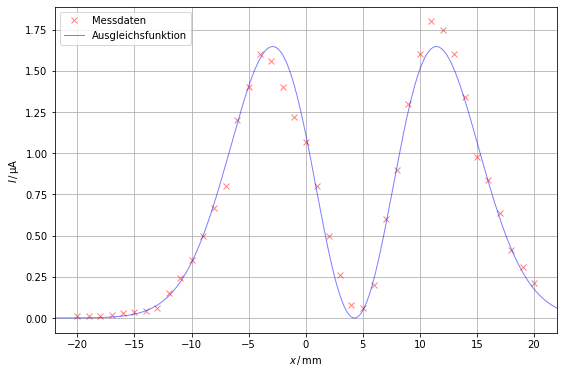

In [63]:
para, pcov = curve_fit(g01, x, tem01, p0=[1,mean01,sigma01])
a, x0, b = para
pcov = np.sqrt(np.diag(pcov))
fa, fx0, fb = pcov
ua = ufloat(a, fa) 
ub = ufloat(b, fb)
ux0 = ufloat(x0, fx0)
print(ua, ub, ux0)

plt.figure(figsize=(9, 6))              # Größe des Plots

xx = np.linspace(-22, 22, 10**4)         # Definitionsbereich

plt.plot(x, tem01, 'xr', markersize=6 , label = 'Messdaten', alpha=0.5)
plt.plot(xx, g01(xx, *para), '-b', linewidth = 1, label = 'Ausgleichsfunktion', alpha=0.5)
plt.xlabel(r'$x \, / \, \mathrm{mm}$')
plt.ylabel(r'$I \, / \, \mathrm{μA}$')
plt.legend(loc="best")                  # legend position
plt.grid(True)                          # grid style
plt.xlim(-22, 22)
# plt.ylim(-0.05, 1.05)

[0.046 0.69  2.2   3.4   4.5   5.5   5.8   5.03  3.8   2.7   1.1   0.27
 0.2   0.32  1.15  2.41  3.55  4.6   5.6   5.2   4.4   3.7   2.1   0.55
 0.03 ]
[  0.  15.  30.  45.  60.  75.  90. 105. 120. 135. 150. 165. 180. 195.
 210. 225. 240. 255. 270. 285. 300. 315. 330. 345. 360.]


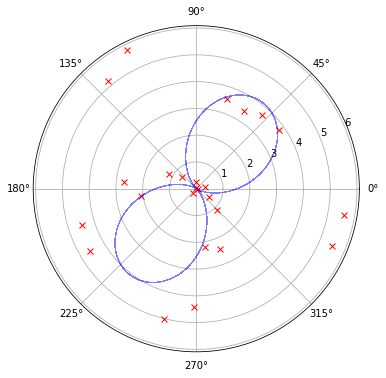

In [66]:
pol = pd.read_csv('tables/polarisation.csv')
np.savetxt('tables/pol.txt', pol.values, header='phi/deg I/mikroA', fmt='%.3f')
phi, I = np.genfromtxt('tables/pol.txt', unpack=True, skip_header=1)
print(I)
print(phi)
phi *= 2 *np.pi/360

# Daten generieren
theta = np.linspace(0, 2*np.pi, 100)
r = 3 + np.cos(5*theta)

def f(phi, I0, phi0):
    return I0 * np.cos(phi + phi0)**2

para, pcov = curve_fit(f, phi, I)
a, b = para
pcov = np.sqrt(np.diag(pcov))
fa, fb = pcov
ua = ufloat(a, fa) 
ub = ufloat(b, fb)

xx = np.linspace(0, 360, 10**4)   

# Polarplot erstellen
fig = plt.figure(figsize=(9, 6))
ax = fig.add_subplot(111, projection='polar')
ax.plot(phi, I, 'xr', label = 'Messdaten')
ax.plot(xx, f(xx, *para), '-b', label = 'Fit', linewidth = 0.5, alpha = 0.5)

In [58]:
spektren = pd.read_csv('tables/abstand.csv')
np.savetxt('tables/abstand.txt', spektren.values, header='L 1 2 3 4 5 6 7 ', fmt='%.3f')
L, nu1, nu2, nu3, nu4, nu5, nu6, nu7 = np.genfromtxt('tables/abstand.txt', unpack=True, skip_header=1)
print(spektren.to_latex(index = False, column_format= "c c c c c c c", decimal=',')) 

print(nu1)

\begin{tabular}{c c c c c c c}
\toprule
 L/cm &  nu1 &  nu2 &  nu3 &  nu4 &   nu5 &    nu6 &    nu7 \\
\midrule
   65 &  248 &  493 &  738 &  983 &   NaN &    NaN &    NaN \\
   80 &  191 &  383 &  570 &  761 & 953,0 & 1140,0 &    NaN \\
   95 &  101 &  318 &  980 &  638 & 795,0 &  956,0 & 1140,0 \\
\bottomrule
\end{tabular}

[248. 191. 101.]


In [59]:
g = pd.read_csv('tables/gitter.csv')
np.savetxt('tables/gitter.txt', g.values, header='n 80 100', fmt='%.3f')
n, g80, g100 = np.genfromtxt('tables/gitter.txt', unpack=True, skip_header=1)
print(g.to_latex(index = False, column_format= "c c c", decimal=','))

\begin{tabular}{c c c}
\toprule
 n &  x\_n/cm &  x\_n/cm.1 \\
\midrule
 1 &     2,2 &       2,0 \\
-1 &     2,2 &       2,0 \\
 2 &     4,3 &       3,9 \\
-2 &     4,3 &       4,0 \\
 3 &     6,3 &       5,9 \\
-3 &     6,6 &       6,0 \\
\bottomrule
\end{tabular}



In [60]:
def f(x_n, n, g, d):
    return x_n * g / (np.abs(n) * np.sqrt(d**2 + x_n**2))

g1 = 1/800 # mikrometer
d1 = 41.5 * 10
g2 = 1/1000
d2 = 30 * 10

lam1 = np.median(f(g80, n, g1, d1))*1e8
lam2 = np.median(f(g100, n, g2, d2))*1e8

print(np.median(f(g80, n, g1, d1)) )
print(np.median(f(g100, n, g2, d2)))

lam0 = 632.8

abw1 = 100*(lam1 - lam0)/lam0
abw2 = 100*(lam2 - lam0)/lam0

print(abw1, abw2)


6.550612098017049e-06
6.665703943137382e-06
3.5178902973617134 5.336661554004153
